# CSE 555 - Introduction to Pattern Recognition
## Programming Assignment 3 - Exact Inference with Probabilistic Graphical Models
### Siddheswar Chandrasekhar (# 50291319)
### siddhesw@buffalo.edu
<br>

### Problem 1

In [10]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import networkx as nx
from matplotlib import pyplot as plt
import pydot

In [11]:
model = BayesianModel([('asia','tub'),('smoke','lung'),('smoke','bronc'),
                       ('tub','either'),('lung','either'),('either','xray'),
                       ('bronc','dysp'),('either','dysp')])

In [12]:
cpd_asia = TabularCPD(variable='asia',
                      variable_card=2,
                      values=[[.01],[.99]])

cpd_tub = TabularCPD(variable='tub',
                      variable_card=2,
                      values=[[.05,.01],[.95,.99]],
                      evidence=['asia'],
                      evidence_card=[2])

cpd_smoke = TabularCPD(variable='smoke',
                       variable_card=2,
                       values=[[.5],[.5]])

cpd_lung = TabularCPD(variable='lung',
                      variable_card=2,
                      values=[[.1,.01],[.9,.99]],
                      evidence=['smoke'],
                      evidence_card=[2])

cpd_bronc = TabularCPD(variable='bronc',
                       variable_card=2,
                       values=[[.6,.3],[.4,.7]],
                       evidence=['smoke'],
                       evidence_card=[2])

cpd_either = TabularCPD(variable='either',
                      variable_card=2,
                      values=[[1,1,1,0],[0,0,0,1]],
                      evidence=['lung','tub'],
                      evidence_card=[2,2])

cpd_xray = TabularCPD(variable='xray',
                    variable_card=2,
                    values=[[.98,.05],[.02,.95]],
                    evidence=['either'],
                    evidence_card=[2])

cpd_dysp = TabularCPD(variable='dysp',
                    variable_card=2,
                    values=[[.9,.7,.8,.1],[.1,.3,.2,.9]],
                    evidence=['bronc','either'],
                    evidence_card=[2,2])

In [13]:
model.add_cpds(cpd_asia, cpd_smoke, cpd_tub, cpd_lung, cpd_bronc, cpd_either, cpd_xray, cpd_dysp)

In [14]:
for cpd in model.get_cpds():
    print("\nCPD of {variable}:".format(variable=cpd.variable))
    print(cpd)


CPD of asia:
+--------+------+
| asia_0 | 0.01 |
+--------+------+
| asia_1 | 0.99 |
+--------+------+

CPD of smoke:
+---------+-----+
| smoke_0 | 0.5 |
+---------+-----+
| smoke_1 | 0.5 |
+---------+-----+

CPD of tub:
+-------+--------+--------+
| asia  | asia_0 | asia_1 |
+-------+--------+--------+
| tub_0 | 0.05   | 0.01   |
+-------+--------+--------+
| tub_1 | 0.95   | 0.99   |
+-------+--------+--------+

CPD of lung:
+--------+---------+---------+
| smoke  | smoke_0 | smoke_1 |
+--------+---------+---------+
| lung_0 | 0.1     | 0.01    |
+--------+---------+---------+
| lung_1 | 0.9     | 0.99    |
+--------+---------+---------+

CPD of bronc:
+---------+---------+---------+
| smoke   | smoke_0 | smoke_1 |
+---------+---------+---------+
| bronc_0 | 0.6     | 0.3     |
+---------+---------+---------+
| bronc_1 | 0.4     | 0.7     |
+---------+---------+---------+

CPD of either:
+----------+--------+--------+--------+--------+
| lung     | lung_0 | lung_0 | lung_1 | lung_1 

In [15]:
model_infer = VariableElimination(model)

In [16]:
joint_prob = model_infer.query(variables=['tub','lung','bronc'],
                               evidence={'asia':0,'xray':0})

print(joint_prob['tub'])
print(joint_prob['lung'])
print(joint_prob['bronc'])

+-------+------------+
| tub   |   phi(tub) |
+=======+============+
| tub_0 |     0.3377 |
+-------+------------+
| tub_1 |     0.6623 |
+-------+------------+
+--------+-------------+
| lung   |   phi(lung) |
+========+=============+
| lung_0 |      0.3715 |
+--------+-------------+
| lung_1 |      0.6285 |
+--------+-------------+
+---------+--------------+
| bronc   |   phi(bronc) |
+=========+==============+
| bronc_0 |       0.4911 |
+---------+--------------+
| bronc_1 |       0.5089 |
+---------+--------------+


In [17]:
moral = model.to_markov_model()
triangulate = moral.triangulate()
junction_tree = triangulate.to_junction_tree()

/Users/siddheswarc/.local/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/siddheswarc/.local/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/siddheswarc/.local/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/siddheswarc/.local/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/Users/siddheswarc/.

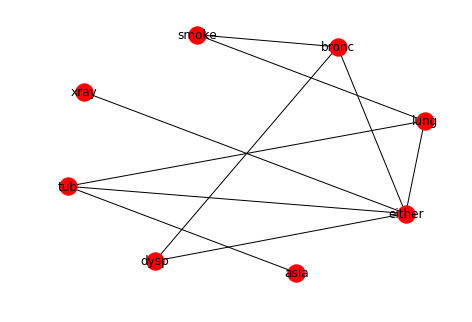

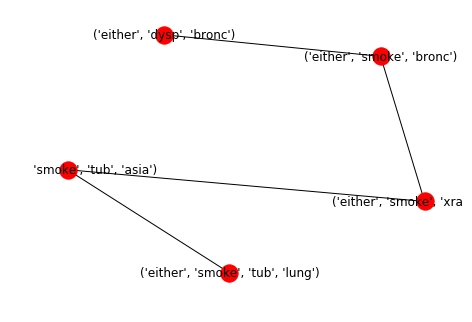

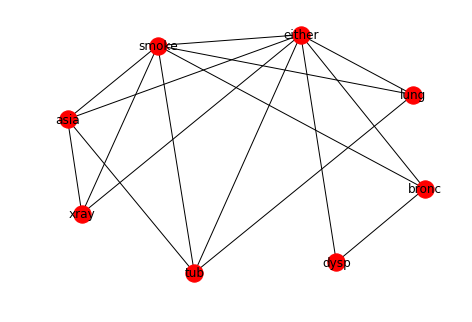

In [18]:
nx.draw(moral, with_labels=True)
plt.show()
nx.draw(junction_tree, with_labels=True)
plt.show()
nx.draw(triangulate, with_labels=True)
plt.show()

##### Question: Explain why the "running intersection property" is satisfied in your junstion tree

The "running intersection property" is satisfied by the junction tree constructed above as for each pair of clusters B and C that contain i, each cluster on the unique path between B and C also contains i.

### Problem 2

##### Question: Describe how the different terms on the right hand side of "p(V ) = p(a)p(t | a)p(s)p(l | s)p(b | s)p(e | t, l)p(d | e, b)p(x | e)" are distributed among the different juction tree clusters.

The approach to distributing the terms among the different junction tree clusters is by "variable elimination".

### References
https://github.com/pgmpy/pgmpy/blob/dev/examples/Creating%20a%20Bayesian%20Network.ipynb
https://github.com/pgmpy/pgmpy/blob/dev/examples/Inference%20in%20Bayesian%20Networks.ipynb